# Factors Affecting solving murder crimes 

In [1]:
import os
from os import listdir
from os.path import isfile, join
import glob
import string
import operator
import csv
import pandas as pd
import calendar
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score
from sklearn import tree

- Path to home directory

In [2]:
homedir = os.path.expanduser("~")
path_to_data = homedir+"\\Final\\Data"
print(path_to_data)

C:\Users\priya\Final\Data


- Reading the data from csv in to the dataframe 

In [3]:
for subdir,dirs, files in os.walk(path_to_data):
    for file in files:
        if file == 'database.csv':
            csv_data1=pd.read_csv(os.path.join(subdir,file))
csv_data1.head(5)

C:\Users\priya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
df = csv_data1[["Victim Sex","Victim Ethnicity","Perpetrator Sex","Perpetrator Age","Perpetrator Race","Victim Race","Victim Age","Victim Count","Perpetrator Count","Crime Solved","Relationship"]].copy()

In [5]:
# Getting only those cases where 1 or more victims are killed 
df = df[(df['Victim Count'] > 0)]   

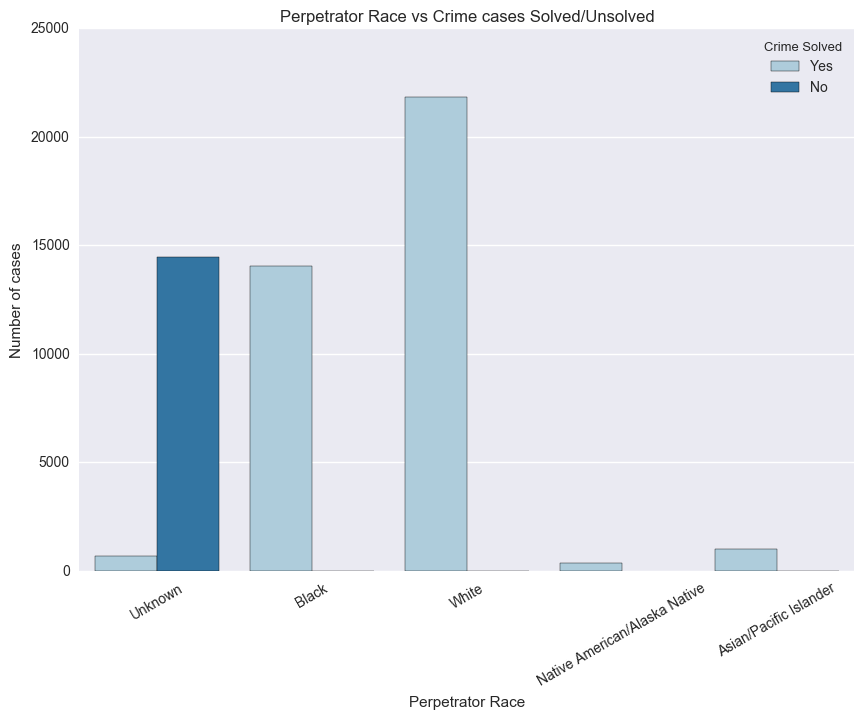

In [32]:
# gettint the unique values for perpetrator race 
races = df['Perpetrator Race'].unique()
a4_dims = (10, 7)
# plotting the graph for number of cases solved or unsolved if perpatrator race is known 
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = df['Perpetrator Race'], hue = df['Crime Solved'],ax=ax, palette = sns.color_palette("Paired",len(races)), data = df)
plt.xticks(rotation=30)
plt.ylabel("Number of cases")
plt.title('Perpetrator Race vs Crime cases Solved/Unsolved')
plt.savefig('Output_Files\\Analysis 2\\png\\Race VS Crimesolved.png', bbox_inches='tight')
plt.show()

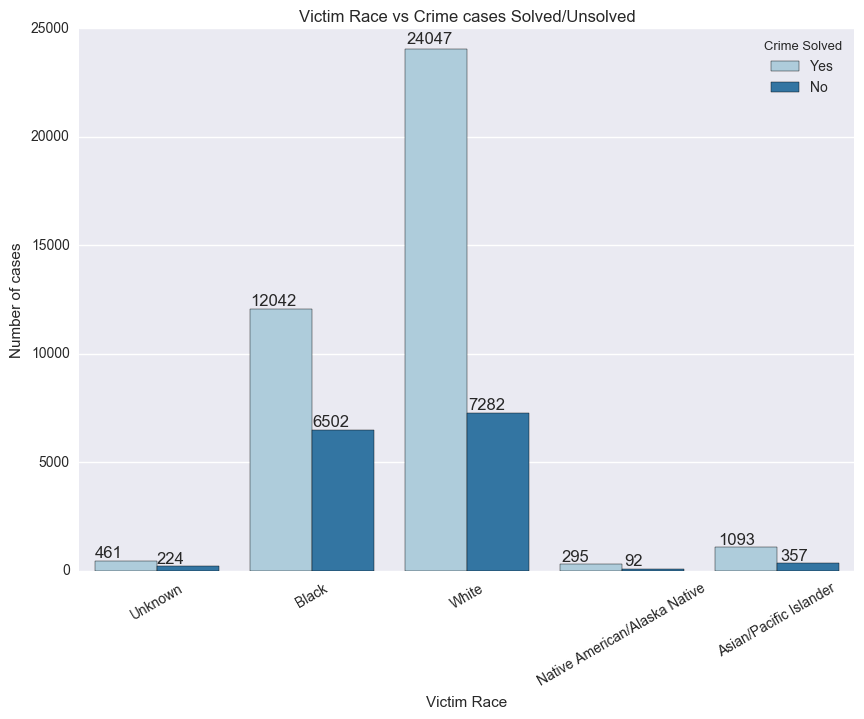

In [33]:

# plotting the graph with victim race
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = df['Victim Race'], hue = df['Crime Solved'], palette = sns.color_palette("Paired",len(races)), data = df)
plt.xticks(rotation=30)
plt.ylabel("Number of cases")
plt.title('Victim Race vs Crime cases Solved/Unsolved')
plt.savefig('Output_Files\\Analysis 2\\png\\victim Race VS Crimesolved.png', bbox_inches='tight')
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')

# To prove above graphs we will use Random Forest algorithm to determine most important factors. 

- First we will creat 2 sample sets from mail dataset for processing. 

In [10]:
nRecords = 200000
snRecords = 1000

In [11]:
random_df = csv_data1.copy(deep=True)

In [12]:
random_df.drop(['Year', 'Month','Incident',
 'City','Agency Name','Agency Type','Record Source','Agency Name'], axis=1,inplace=True)

In [14]:
#These two will be our datasets for Tree testing to find feature importance

df1 = random_df[(random_df['Record ID']<nRecords)]
sdf1 = df1[(random_df['Record ID']<snRecords) & df1['Victim Count']>0]

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [23]:
treedf = random_df[(random_df['Record ID']>=nRecords)&(random_df['Record ID']<2*nRecords)]
n_estimators = 10
clf = RandomForestClassifier(n_estimators)


#Preparing training set
dfcopy = df1.copy(deep = True)
random_y = df1['Crime Solved']
dfcopy.drop('Crime Solved', axis = 1, inplace = True)

# iterating through the training set and compairing the values 
for z in dfcopy.columns:
    if isinstance(z[0],str):
        arr = dfcopy[z].unique()
        le = preprocessing.LabelEncoder()
        le.fit(arr)
        dfcopy[z] = le.transform(dfcopy[z])
    
clf.fit(dfcopy, random_y)

# getting the score for each feature 
scores = clf.score(dfcopy, random_y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking for first set:")

for f in range(dfcopy.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], 
dfcopy.columns[indices[f]]))

Feature ranking for first set:
1. feature 8 (0.374281) - Perpetrator Sex
2. feature 9 (0.294687) - Perpetrator Age
3. feature 12 (0.157919) - Relationship
4. feature 10 (0.118235) - Perpetrator Race
5. feature 11 (0.043070) - Perpetrator Ethnicity
6. feature 2 (0.004336) - State
7. feature 15 (0.002349) - Perpetrator Count
8. feature 1 (0.001761) - Agency Code
9. feature 7 (0.001545) - Victim Ethnicity
10. feature 5 (0.001083) - Victim Age
11. feature 0 (0.000457) - Record ID
12. feature 13 (0.000195) - Weapon
13. feature 6 (0.000037) - Victim Race
14. feature 4 (0.000029) - Victim Sex
15. feature 14 (0.000011) - Victim Count
16. feature 3 (0.000006) - Crime Type


# Performing the algorithm on another sample set to get clear idea 

In [24]:
#Prepare test data
treedfcopy = treedf.copy(deep = True)
test_y = treedf['Crime Solved']
treedfcopy.drop('Crime Solved', axis = 1, inplace = True)

for z in treedfcopy.columns:
    if isinstance(z[0],str):
        arr = treedfcopy[z].unique()
        le = preprocessing.LabelEncoder()
        le.fit(arr)
        treedfcopy[z] = le.transform(treedfcopy[z])

clf.fit(treedfcopy, test_y)
scores = clf.score(treedfcopy, test_y)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature ranking for second set:")

for f in range(treedfcopy.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], treedfcopy.columns[indices[f]]))


Feature ranking for second set:
1. feature 8 (0.585950) - Perpetrator Sex
2. feature 9 (0.240090) - Perpetrator Age
3. feature 12 (0.085056) - Relationship
4. feature 10 (0.054181) - Perpetrator Race
5. feature 11 (0.013668) - Perpetrator Ethnicity
6. feature 6 (0.009537) - Victim Race
7. feature 15 (0.007491) - Perpetrator Count
8. feature 2 (0.001985) - State
9. feature 0 (0.000575) - Record ID
10. feature 14 (0.000470) - Victim Count
11. feature 1 (0.000343) - Agency Code
12. feature 5 (0.000301) - Victim Age
13. feature 7 (0.000217) - Victim Ethnicity
14. feature 13 (0.000089) - Weapon
15. feature 4 (0.000047) - Victim Sex
16. feature 3 (0.000002) - Crime Type


Most valuable features above 15%: Perpetrator Sex, Perpetrator Age, Perpetrator Race,Relationship

- We will try plotting the graph for Relationship 

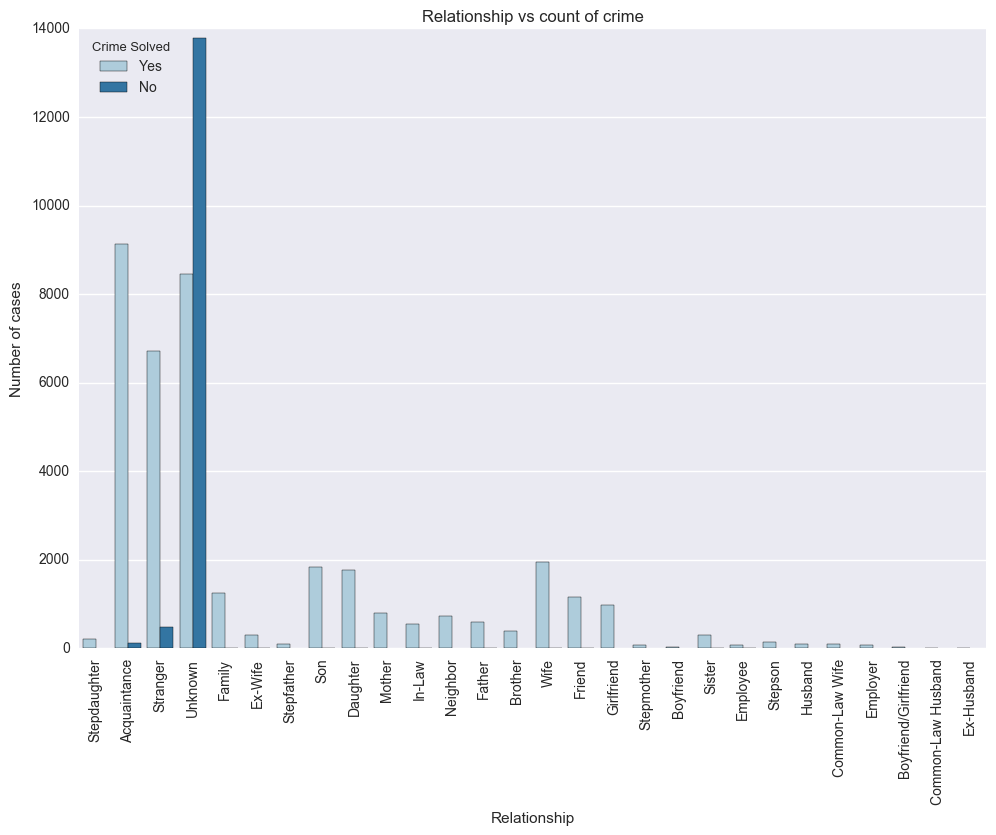

In [31]:
# getting the value for each relation ship 
relation = df['Relationship'].unique()
a4_dims = (11.7, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = df['Relationship'], hue = df['Crime Solved'], palette = sns.color_palette("Paired",len(relation)), data = df.head())
plt.title("Relationship vs count of crime")
plt.ylabel("Number of cases")
plt.xticks(rotation=90)
plt.savefig('Output_Files\\Analysis 2\\png\\Relationship VS Crimesolved.png', bbox_inches='tight')
plt.show()